In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 设置中文字体（以SimHei为例）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题

In [80]:
excel_file_path = '不打折分类数据.xlsx'

data_1 = pd.read_excel(excel_file_path, sheet_name=0)

In [81]:
data_1

,销售日期,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),是否打折销售,利润率
0,2020-07-01,水生根茎类,0.251,10.0,5.65,否,0.769912
1,2020-07-01,水生根茎类,0.711,10.0,5.65,否,0.769912
2,2020-07-01,水生根茎类,0.545,39.8,29.43,否,0.352362
3,2020-07-01,水生根茎类,0.291,10.0,5.65,否,0.769912
4,2020-07-01,水生根茎类,0.361,10.0,5.65,否,0.769912
...,...,...,...,...,...,...,...
52817,2023-06-30,水生根茎类,1.039,14.0,9.16,否,0.528384
52818,2023-06-30,水生根茎类,0.745,14.0,9.16,否,0.528384
52819,2023-06-30,水生根茎类,0.509,14.0,9.16,否,0.528384
52820,2023-06-30,水生根茎类,0.172,14.0,9.16,否,0.528384


In [82]:
# 将销售日期列转换为日期类型
data_1['销售日期'] = pd.to_datetime(data_1['销售日期'])

# 设置销售日期列为索引
data_1.set_index('销售日期', inplace=True)

# 按日对销售数据进行汇总
daily_sales = data_1['销量(千克)'].resample('D').sum()  # 计算每日总销量
daily_avg_profit_margin = data_1['利润率'].resample('D').mean()  # 计算每日平均利润率

# 创建新的DataFrame包含日销量和日平均利润率
daily_data = pd.DataFrame({'日销量(千克)': daily_sales, '日平均利润率': daily_avg_profit_margin})

# 打印结果
print(daily_data)

            日销量(千克)    日平均利润率
销售日期                         
2020-07-01    4.850  0.714238
2020-07-02    4.600  0.703021
2020-07-03    4.410  0.782531
2020-07-04    5.439  0.685346
2020-07-05    4.019  0.845018
...             ...       ...
2023-06-26    9.393  0.438374
2023-06-27    8.721  0.506856
2023-06-28    5.986  0.516971
2023-06-29   18.558  0.471653
2023-06-30   10.340  0.539411

[1095 rows x 2 columns]


In [83]:
def cleaner(data):
    df = pd.DataFrame(data)

   # 计算每列数据的均值和标准差
    mean = data.mean()
    std = data.std()

    # 定义异常值的阈值，通常为均值加减3倍标准差
    threshold = 3 * std

    # 找到异常值的索引
    outliers = (data - mean).abs() > threshold
    
    # 删除异常值所在的行
    data_cleaned = data[~outliers].dropna()

    return data_cleaned

In [84]:
data = cleaner(daily_data)
data

,日销量(千克),日平均利润率
销售日期,,
2020-07-01,4.850,0.714238
2020-07-02,4.600,0.703021
2020-07-03,4.410,0.782531
2020-07-04,5.439,0.685346
2020-07-05,4.019,0.845018
...,...,...
2023-06-26,9.393,0.438374
2023-06-27,8.721,0.506856
2023-06-28,5.986,0.516971


In [86]:
data = data.reset_index()

# 定义开始日期和结束日期
start_date = '2022-06-30'
end_date = '2023-06-30'

# 使用条件筛选，选择在日期范围内的数据
data = data[(data['销售日期'] >= start_date) & (data['销售日期'] <= end_date)]
data

,销售日期,日销量(千克),日平均利润率
721,2022-06-30,10.625,0.482865
722,2022-07-01,15.086,0.534477
723,2022-07-02,28.667,0.579623
724,2022-07-03,63.873,0.616603
725,2022-07-04,20.219,0.538723
...,...,...,...
1065,2023-06-26,9.393,0.438374
1066,2023-06-27,8.721,0.506856
1067,2023-06-28,5.986,0.516971
1068,2023-06-29,18.558,0.471653


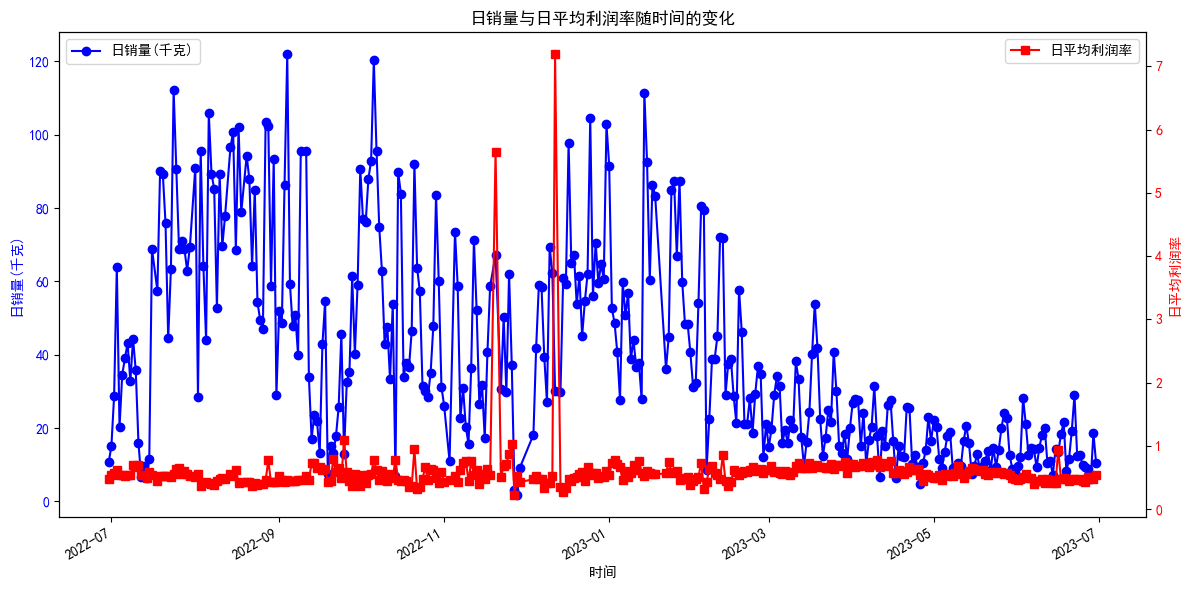

In [87]:
# 创建画布和坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制日销量的折线图
ax1.plot(data['销售日期'], data['日销量(千克)'], color='b', marker='o', label='日销量(千克)')
ax1.set_xlabel('时间')
ax1.set_ylabel('日销量(千克)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# 创建第二个坐标轴并共享x轴
ax2 = ax1.twinx()

# 绘制日平均利润率的折线图
ax2.plot(data['销售日期'], data['日平均利润率'], color='r', marker='s', label='日平均利润率')
ax2.set_ylabel('日平均利润率', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# 添加标题
plt.title('日销量与日平均利润率随时间的变化')

# 自动旋转和对齐日期标签，使横轴更宽
plt.gcf().autofmt_xdate()

# 显示图表
plt.tight_layout()
plt.show()

In [37]:
data.set_index('销售日期', inplace=True)
data

,日销量(千克),日平均利润率
销售日期,,
2022-06-30,10.625,0.482865
2022-07-01,15.086,0.534477
2022-07-02,28.667,0.579623
2022-07-03,63.873,0.616603
2022-07-04,20.219,0.538723
...,...,...
2023-06-26,9.393,0.438374
2023-06-27,8.721,0.506856
2023-06-28,5.986,0.516971


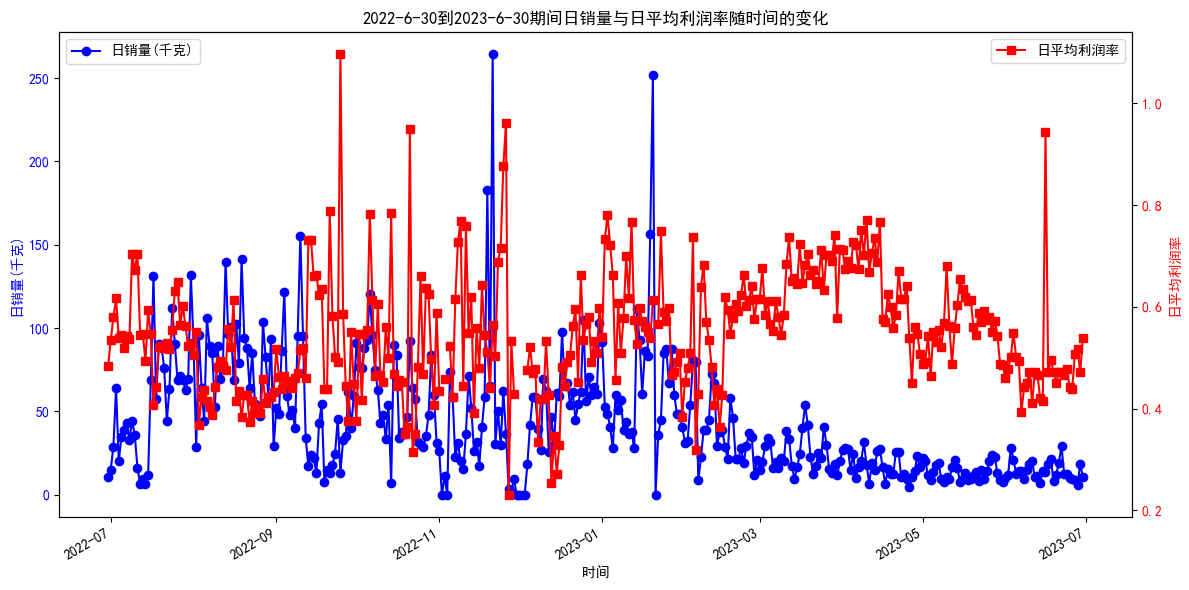

In [39]:
# 创建画布和坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制日销量的折线图
ax1.plot(data.index, data['日销量(千克)'], color='b', marker='o', label='日销量(千克)')
ax1.set_xlabel('时间')
ax1.set_ylabel('日销量(千克)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# 创建第二个坐标轴并共享x轴
ax2 = ax1.twinx()

# 绘制日平均利润率的折线图
ax2.plot(data.index, data['日平均利润率'], color='r', marker='s', label='日平均利润率')
ax2.set_ylabel('日平均利润率', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# 添加标题
plt.title('2022-6-30到2023-6-30期间日销量与日平均利润率随时间的变化')

# 自动旋转和对齐日期标签，使横轴更宽
plt.gcf().autofmt_xdate()

# 显示图表
plt.tight_layout()
plt.show()

In [43]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA 

# 选择自变量（利润率）和因变量（日销量）
X = data['日平均利润率']
y = data['日销量(千克)']

# 拟合ARIMA模型
model = ARIMA(y, order=(1, 0, 1))  # 选择合适的ARIMA阶数
results = model.fit()

# 打印模型摘要
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                日销量(千克)   No. Observations:                  366
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1738.192
Date:                Fri, 08 Sep 2023   AIC                           3484.384
Time:                        20:55:52   BIC                           3499.994
Sample:                    06-30-2022   HQIC                          3490.587
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5611     10.035      4.142      0.000      21.894      61.229
ar.L1          0.9076      0.037     24.456      0.000       0.835       0.980
ma.L1         -0.5799      0.050    -11.489      0.0

D:\Ananconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Ananconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Ananconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


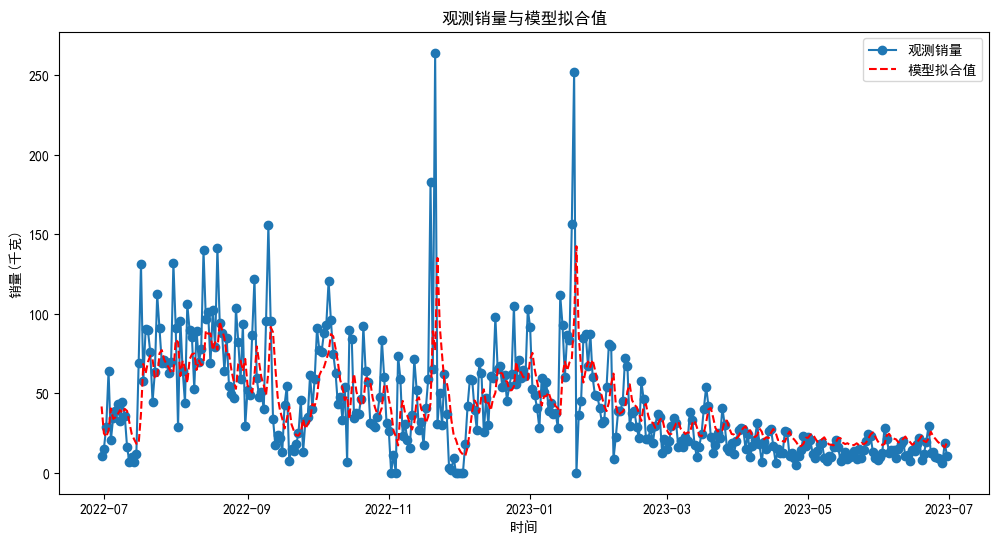

In [45]:
# 获取模型拟合值
fitted_values = results.fittedvalues

# 绘制观测销量和模型拟合值的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(y, label='观测销量', marker='o', linestyle='-')
plt.plot(fitted_values, label='模型拟合值', color='red', linestyle='--')
plt.xlabel('时间')
plt.ylabel('销量(千克)')
plt.legend()
plt.title('观测销量与模型拟合值')
plt.show()


In [44]:
# 进行预测
n_forecast = 10  # 假设要预测未来10个时间点
forecast = results.get_forecast(steps=n_forecast)

# 获取预测的均值和置信区间
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

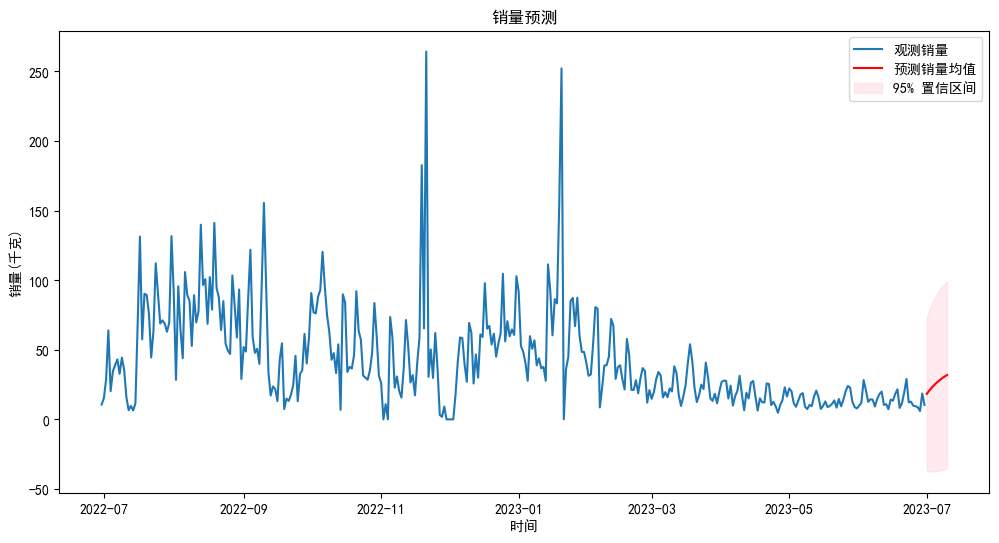

In [42]:
# 绘制观测销量、预测均值和置信区间的时间序列图

plt.figure(figsize=(12, 6))
plt.plot(y, label='观测销量')
plt.plot(forecast_mean, label='预测销量均值', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% 置信区间')
plt.xlabel('时间')
plt.ylabel('销量(千克)')
plt.legend()
plt.title('销量预测')
plt.show()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-06-30 to 2023-06-30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   日销量(千克)  366 non-null    float64
 1   日平均利润率   359 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [55]:
data = data.dropna()

In [56]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# 假设data包含了时间序列数据，包括销量和利润率，列名为"销量"和"利润率"
# data = ...

# 创建VAR模型
model = VAR(data)

# 拟合VAR模型并选择滞后阶数（可以根据信息准则进行选择）
lag_order = model.select_order()

# 选择最佳滞后阶数并重新拟合模型
model_fitted = model.fit(lag_order)

# 打印VAR模型的摘要
print(model_fitted.summary())

# 获取VAR模型的系数矩阵
coeff_matrix = model_fitted.coefs

# 提取销量与利润率之间的关系
relationship_matrix = coeff_matrix[:, :, 0]  # 假设销量在第一个位置，利润率在第二个位置

# 打印销量与利润率之间的关系
print("销量与利润率之间的关系矩阵：")
print(relationship_matrix)


D:\Ananconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


TypeError: unsupported operand type(s) for +: 'LagOrderResults' and 'int'

斜率 (回归系数): -55.56688421312973
截距: 74.09185715337314


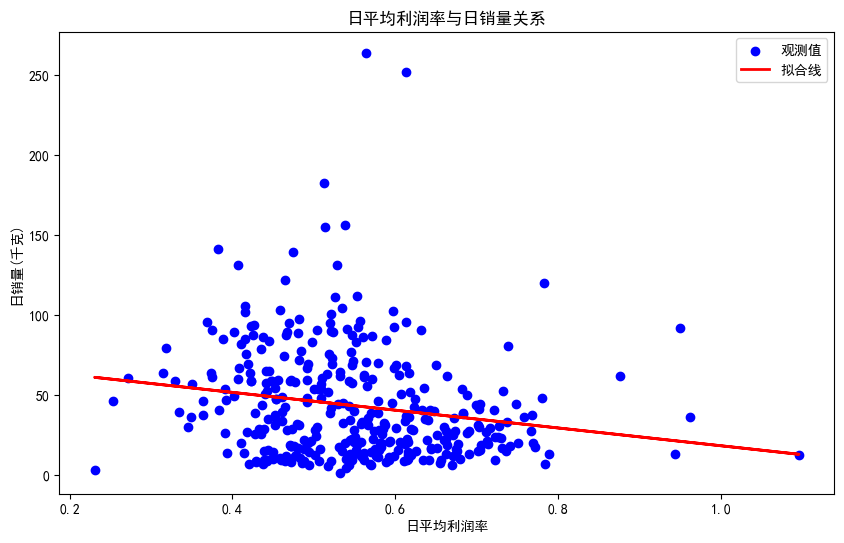

In [57]:
# 提取自变量和因变量
X = data['日平均利润率'].values.reshape(-1, 1)  # 将自变量转换为二维数组
y = data['日销量(千克)'].values

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

# 获取回归系数
slope = model.coef_[0]
intercept = model.intercept_

# 打印回归系数
print("斜率 (回归系数):", slope)
print("截距:", intercept)

# 绘制散点图和拟合线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='观测值', color='blue')
plt.plot(X, model.predict(X), label='拟合线', color='red', linewidth=2)
plt.xlabel('日平均利润率')
plt.ylabel('日销量(千克)')
plt.legend()
plt.title('日平均利润率与日销量关系')
plt.show()

In [59]:
from sklearn.metrics import r2_score

# 预测利润率
predicted_sales = model.predict(X)
r2 = r2_score(y, predicted_sales)
print(f'R²: {r2}')

R²: 0.033605095341226465
